/Users/huangjiamu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


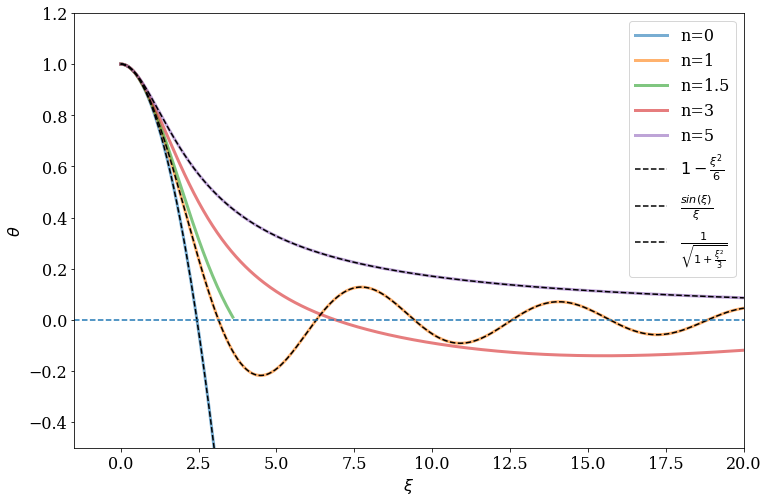

In [1]:
## HW4 1(b)
## Oct 24 2021 by Jiamu

import numpy as np
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt

# Eqn(1): 1/xi^2 * d/dxi (xi^2 dtheta/dxi) = -theta^n
# Multiply by xi^2: d/dxi (xi^2 dtheta/dxi) = -(xi^2) * theta^n

# Initial Conditions
theta_0 = 1
dthetadxi_0 = 0
coord_0 = [theta_0,dthetadxi_0]
# Variable Xi
xi = np.linspace(0.0001, 100., 2000)
# Lane-Emden Eqn
def eqn1(coord,xi,n):  
    theta, dthetadxi = coord
    ddxi = [dthetadxi/(xi**2), -(xi**2)*theta**n]  
    return ddxi

plt.figure(figsize=[12,8])
font = {'family' : 'serif',
#        'weight' : 'bold',
        'size'   : 16,}
matplotlib.rc('font', **font)
# Solve eqn(1) for different polytropic indicies
for n in [0,1,1.5,3,5]:
    theta_xi = odeint(eqn1, coord_0, xi, args=(n,))
    plt.plot(xi, theta_xi[:, 0], label=f'n={n}',linewidth=3,alpha=0.6)
    
# Given analytic solutions
plt.plot(xi, 1-(xi**2)/6, ls='--',label=r'$1-\frac{\xi^2}{6}$',color='k')
plt.plot(xi, (np.sin(xi))/xi, ls='--',label=r'$\frac{sin(\xi)}{\xi}$',color='k')
plt.plot(xi, 1/(np.sqrt(1+(xi**2)/3)), ls='--',label=r'$\frac{1}{\sqrt{1+\frac{\xi^2}{3}}}$',color='k')
plt.axhline(y=0,ls='--')
plt.ylim(-.5, 1.2)
plt.xlim(-1.5, 20)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta$')
plt.legend()
plt.show()

3000000.0


Text(0, 0.5, 'v(r)/cs')

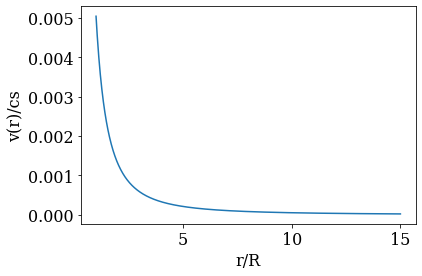

In [2]:
## HW4 3b(i)
## Oct 26 2021 by Jiamu

from scipy.optimize import fsolve

# Eqn(7): v*e^(-v^2/(2*cs^2)) - cs*(r/rs)^(-2)*e^(3/2-2*rs/r) = 0

# Constants
cs = 3e6
M = 6e27 # for Earth
R = 6.4e8 # for Earth
G = 6.67e-8
rs = G*M/(2*cs**2)
print(cs)

# Variable r
r = np.linspace(R, 15*R, 1000)

# function for numerical solver: This equal to zero is our equation for the velocity
def vr(v, r, cs, rs):
    return( v*np.exp(-v**2/(2*cs**2)) - cs*(r/rs)**(-2)*np.exp(3/2 - 2*rs/r) )

# The starting estimate for the roots of eqn(7)
vinit = np.full((1, 1000), 10)
# solve for v(r)
velocity = fsolve(vr, vinit, args=(r,cs,rs,))
plt.figure(figsize=[6,4])
font = {'family' : 'serif',
#        'weight' : 'bold',
        'size'   : 16,}
matplotlib.rc('font', **font)
plt.plot(r/R, velocity/cs)
plt.xlabel('r/R')
plt.ylabel('v(r)/cs')

This result does not seem reasonable because the wind velocity should increase as a function of radius, but in my plot shows the opposite! After looking the HW solutions I realized that the problem should be that the starting velocity(guessed velocity) has to be larger than $c_s$ when the radius larger than sonic radius. After adding that in the code, I got:

cs = 10000.0


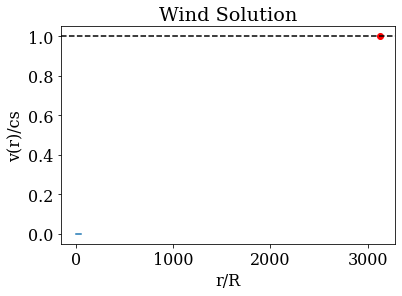

cs = 100000.0


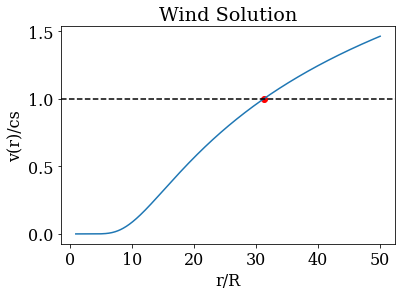

cs = 200000.0


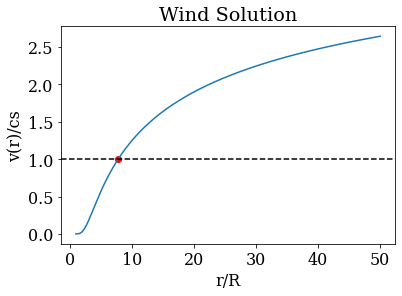

cs = 400000.0


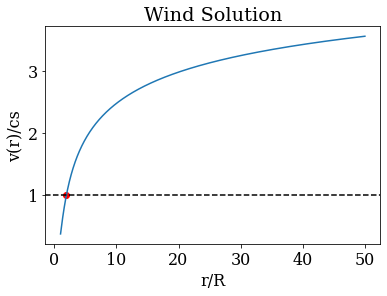

In [3]:
## HW4 3b(i), adjusted v_guess
## Oct 26 2021 by Jiamu

# Eqn(7): v*e^(-v^2/(2*cs^2)) - cs*(r/rs)^(-2)*e^(3/2-2*rs/r) = 0

# try diffenent sound speed(temperature)
vcs = [1e4, 1e5, 2e5, 4e5]
M = 6e27 # for Earth
R = 6.4e8 # for Earth
G = 6.67e-8

# Variable r
r = np.linspace(R, 50*R, 1000)

# try different sound speeds
for cs in vcs:
    print('cs =', cs)
    rs = G*M/(2*cs**2)
    def vr(v, r, cs, rs):
        return( v*np.exp(-v**2/(2*cs**2)) - cs*(r/rs)**(-2)*np.exp(3/2 - 2*rs/r) )

    # The initial value for v(r) should be larger than speed of sound after crossing the sonic point.
    # guesses, using the code in HW solution
    vguess = np.zeros(1000)
    vguess[r > rs] = 2.0*cs
    velocity = fsolve(vr, vguess, args=(r,cs,rs,))
    plt.figure(figsize=[6,4])
    plt.plot(r/R, velocity/cs)
    plt.scatter(rs/R,1,color='r')
    plt.axhline(y=1,linestyle='--',color='k')
    plt.xlabel('r/R')
    plt.ylabel('v(r)/cs')
    plt.title('Wind Solution')
    plt.show()

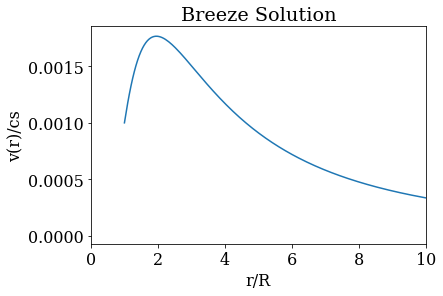

In [4]:
## HW4 3b(ii)
## Oct 26 2021 by Jiamu

# Eqn(8): (1/v) * dv/dr(v^2 - cs^2) = 2cs^2/r - GM/r
# dv/dr = (2cs^2/r - GM/r)*v/(v^2 - cs^2)

cs = 4e5
def eqn8(coords, r, cs, M, G):
    v = coords
    dvdr = (2.*cs**2/r - G*M/r**2)*v/(v**2-cs**2)
    return dvdr

# launch veclcity
v_0 = 0.001*cs
coords_0 = v_0
# solve for v(r)
vel = odeint(eqn8, coords_0, r, args=(cs,M,G,))
plt.plot(r/R, vel[:,0]/cs)
plt.xlim(0,10)
plt.xlabel('r/R')
plt.ylabel('v(r)/cs')
plt.title('Breeze Solution');

In Ruth's solution, there is a line that considers the case where $r=r_s$. In that case $\frac{GM}{r_s^2} = \frac{4c_s^4}{GM}$ and $\frac{2c_s^2}{r_s} = \frac{4c_s^4}{GM}$, so RHS of eqn(8) is zero. As discussed in the class, we need $\frac{dv}{dr} = \frac{2c_s^3}{GM}$ at the sonic point(L'Hopital's rule). However, adding this line does not affect my result for breeze solution. My guess is that for breeze solution, $v<c_s$ is always true, so at the sonic point there is no need to use L'Hopital's rule to get the boundary condition for $r=r_s$. The sonic point is not that special for breeze solution because $\frac{dv}{dr}|_{r=r_s} = 0$, as shown in the above plot at $r\sim2R$. So I guess it's safe to take that line out if we know there is no wind outflow/inflow.

By the way, I didn't realize that we also need to find the solution for $\rho$, so I will just copy and paste Ruth's code for density below;)

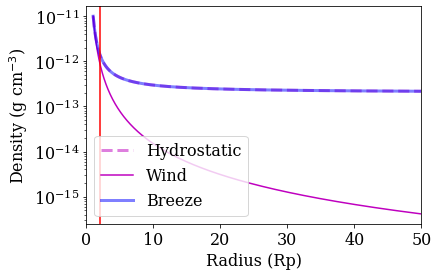

In [6]:
## Density code by Ruth, with a little bit of change of the variables

cs = 4e5
H = R**2*cs**2/G/M
rho0 = 1e-11  # g/cm^3; density at r = Rp
rho_hydrostat = rho0*np.exp((R/H)*(R/r-1.0))  # hydrostatic atmosphere

# use the solution for v at r = Rp to calculate Mdot
Mdot_wind = 4.*np.pi*R**2*rho0*velocity[0] 
rho_wind_solved = Mdot_wind/(4.*np.pi*r**2*velocity) # get the density from Mdot = constant

# get density from Mdot
Mdot_breeze = 4.*np.pi*R**2*rho0*vel[:,0][0]
rho_breeze = Mdot_breeze/(4.*np.pi*r**2*vel[:,0])

plt.semilogy(r/R, rho_hydrostat, 'm--',alpha=0.5,linewidth=3,label='Hydrostatic')
plt.semilogy(r/R, rho_wind_solved, 'm',label='Wind')
plt.semilogy(r/R, rho_breeze, 'b',alpha=0.5,linewidth=3,label='Breeze')
plt.axvline(rs/R, color='red')
plt.legend()
plt.xlim(0,50)
plt.xlabel('Radius (Rp)')
plt.ylabel('Density (g cm$^{-3}$)');

The the breeze density profile is very close to the hydrostatic solution.